In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

In [148]:
# loading data
enter_data = pd.read_csv('CarDekho.csv')

# data cleaning
data = enter_data[["Make", "Year", "Kilometer", "Fuel Type", "Transmission", "Owner", "Seating Capacity", "Fuel Tank Capacity"]]
data

,Make,Year,Kilometer,Fuel Type,Transmission,Owner,Seating Capacity,Fuel Tank Capacity
0,Honda,2017,87150,Petrol,Manual,First,5.0,35.0
1,Maruti Suzuki,2014,75000,Diesel,Manual,Second,5.0,42.0
2,Hyundai,2011,67000,Petrol,Manual,First,5.0,35.0
3,Toyota,2019,37500,Petrol,Manual,First,5.0,37.0
4,Toyota,2018,69000,Diesel,Manual,First,7.0,55.0
...,...,...,...,...,...,...,...,...
2054,Mahindra,2016,90300,Diesel,Manual,First,7.0,70.0
2055,Hyundai,2014,83000,Petrol,Manual,Second,5.0,32.0
2056,Ford,2013,73000,Petrol,Manual,First,5.0,45.0
2057,BMW,2018,60474,Diesel,Automatic,First,5.0,65.0


##Calculo de error cuadrático

In [83]:
def error_rate(w, X, Y):
    N = X.shape[0]
    E = 0
    for i in range(N):
        E += (np.dot(X[i],w) - Y[i])**2
    return E[0]/N

##Algoritmo de descenso de gradiente

In [143]:
# Algoritmo de descenso de gradiente
def gradient_descent(X, Y, weights, learning_rate):

    dldw = np.zeros((len(weights), 1))
    N = X.shape[0] # número de filas de la matriz X

    # Calculo de la derivada parcial de loss con respecto a cada peso
    for i in range(N):
        dldw += np.transpose([X[i]]) * ((Y[i] - np.dot(X[i], weights))[0])

    weights = weights + learning_rate * dldw
    
    return weights

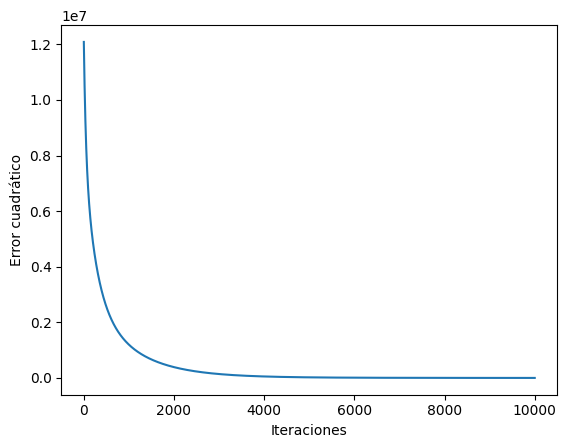

pesos reales: [[-63  41 -28  38  34 -21]]
pesos estimados: [[-62.44754399  40.47561852 -28.38061677  36.83932153  34.97171061
    0.972601  ]]


In [166]:
# Inicialización de Parámetros
random_seed = 1
number_weights = 6
weight_range = 100
x_range = 100 
number_seeds = 10
learning_rate = 0.0000001

max_iter = 10000
epsilon = 0.0001

np.random.seed(random_seed)   # Para que los datos sean reproducibles
weights = np.random.choice(np.concatenate((np.arange(-weight_range, 0), np.arange(1, weight_range+1))), size=(number_weights, 1)) #pesos a estimar
X0 = np.ones((number_seeds, 1)) #parametro X0 equivalente a 1 en cada vector X add 
X1toN = np.random.randint(1, x_range+1, size=(number_seeds, number_weights-1))  
X = np.concatenate((X1toN, X0), axis=1)# X = conjunto de variables independientes


#w = weights[0][:-1]
w0 = weights[-1]

#Y = X1toN*w # + w0 que no consideramos por no ser significativa
Y = np.dot(X,weights) 

w = np.ones((number_weights,1)) #pesos iniciales
error = []
gotten_values = []

#Iteración del algoritmo 
for i in range(max_iter):
    w = gradient_descent(X, Y, w, learning_rate)
    gotten_values.append(w)
    err = error_rate(w, X, Y)
    error.append(err)
    if err < epsilon:
        break
p.plot([i+1 for i in range(len(error))], error)
p.xlabel("Iteraciones")
p.ylabel("Error cuadrático")
p.show()

print(f"pesos reales: {np.transpose(weights)}")
print(f"pesos estimados: {np.transpose(w)}")